In [ ]:
import cv2
import numpy as np
font = cv2.FONT_HERSHEY_SIMPLEX
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
cx,cy = -1,-1
#mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,cx,cy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy=x,y
        cx,cy=x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cx,cy=x,y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cx,cy = x,y
def nothing(x):
    pass

In [ ]:
img = cv2.imread('sky.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value','image',0,255,nothing)
while(1):
    img = cv2.imread('sky.jpg')
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode+=1
        if mode > 3:
            mode=0
    elif k == 27:
        break
    #get current positions of four trackars
    value = cv2.getTrackbarPos('value','image')
    if ix != -1 and iy != -1:
        cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0)
        if mode == 1:
            clip = img[iy:cy,ix:cx]
            clip[:,:,1]=0 #green
            clip[:,:,2]=0 #red
        elif mode == 2:
            clip=img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,2]=0 #red
        elif mode == 3:
            clip=img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,1]=0 #green
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+") - "+str(value)
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

In [77]:
def imageshow(img):
    cv2.imshow('image',img)
    k = cv2.waitKey(0)
    if k == 27 :
        cv2.destroyAllWindows()

In [78]:
img = cv2.imread('test.jpg')

In [79]:
img.shape #height width channel

(667, 1218, 3)

In [ ]:
img[0:200,0:200]=[0,0,255]

In [ ]:
imageshow(img)

In [ ]:
img = cv2.imread('test.jpg')
clip = img[400:600,400:500]
img[100:300,100:200]=clip
clip[:,:,1]=0 #green
clip[:,:,2]=0 #red

In [ ]:
imageshow(img)

## Measuring Performence OpenCV

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('opencv_logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

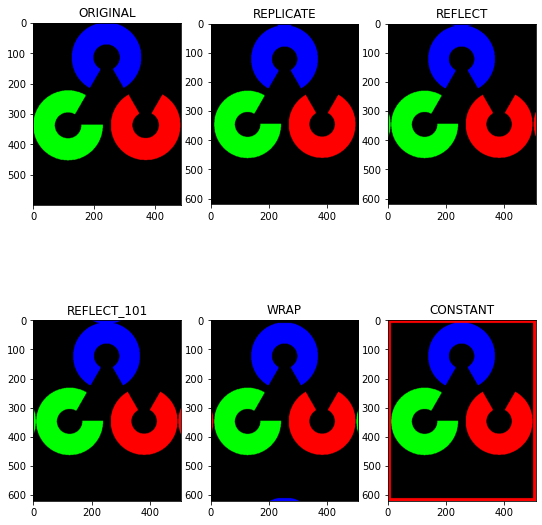

In [21]:
plt.figure(figsize=(9,10))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

## TrackBar Using

In [16]:
import cv2
import numpy as np

def nothing(x):
    pass

In [17]:
img1 = cv2.imread('sss.png')
img2 = cv2.imread('opencv_logo.png')

In [28]:
cv2.namedWindow('image')
cv2.createTrackbar('blending','image',0,64,nothing) #트랙바 생성

a=0.0

while(1):
    #이미지 생성
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
    #이미지 정의, addWeighted 함수를 이용함.
    img = cv2. addWeighted(img1, (64.0-blend)/64, img2, blend/64, 0)
    
    #트랙바를 적용할 범위를 받는다.
    blend = cv2.getTrackbarPos('blending','image')
cv2.waitKey(0)
cv2.destroyAllWindows()

## Measuring Performance with OpenCV

In [13]:
import cv2

img = cv2.imread('sky.jpg')

e1 = cv2.getTickCount()

for i in range(5,49,2):
    img = cv2.medianBlur(img, i)
    
e2 = cv2.getTickCount()

t = (e2 - e1)/cv2.getTickFrequency()

In [14]:
e1

9634940965631

In [15]:
e2

9634963625418

In [16]:
cv2.getTickFrequency()

10000000.0

In [17]:
print(t)

2.2659787


## MedianBlur Using

In [30]:
import cv2
def nothing(x):
    pass

cv2.namedWindow('image')

cv2.createTrackbar('medianBlur','image',0,255,nothing)

img = cv2.imread('sky.jpg')

while(1):
    mblur = cv2.getTrackbarPos('medianBlur','image')
    if (mblur % 2 == 0):
        mblur+=1
    dst = cv2.medianBlur(img,mblur)
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()